![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras import backend as K
from livelossplot import PlotLossesKeras
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from math import sqrt
import time
import keras
from keras.callbacks import History

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


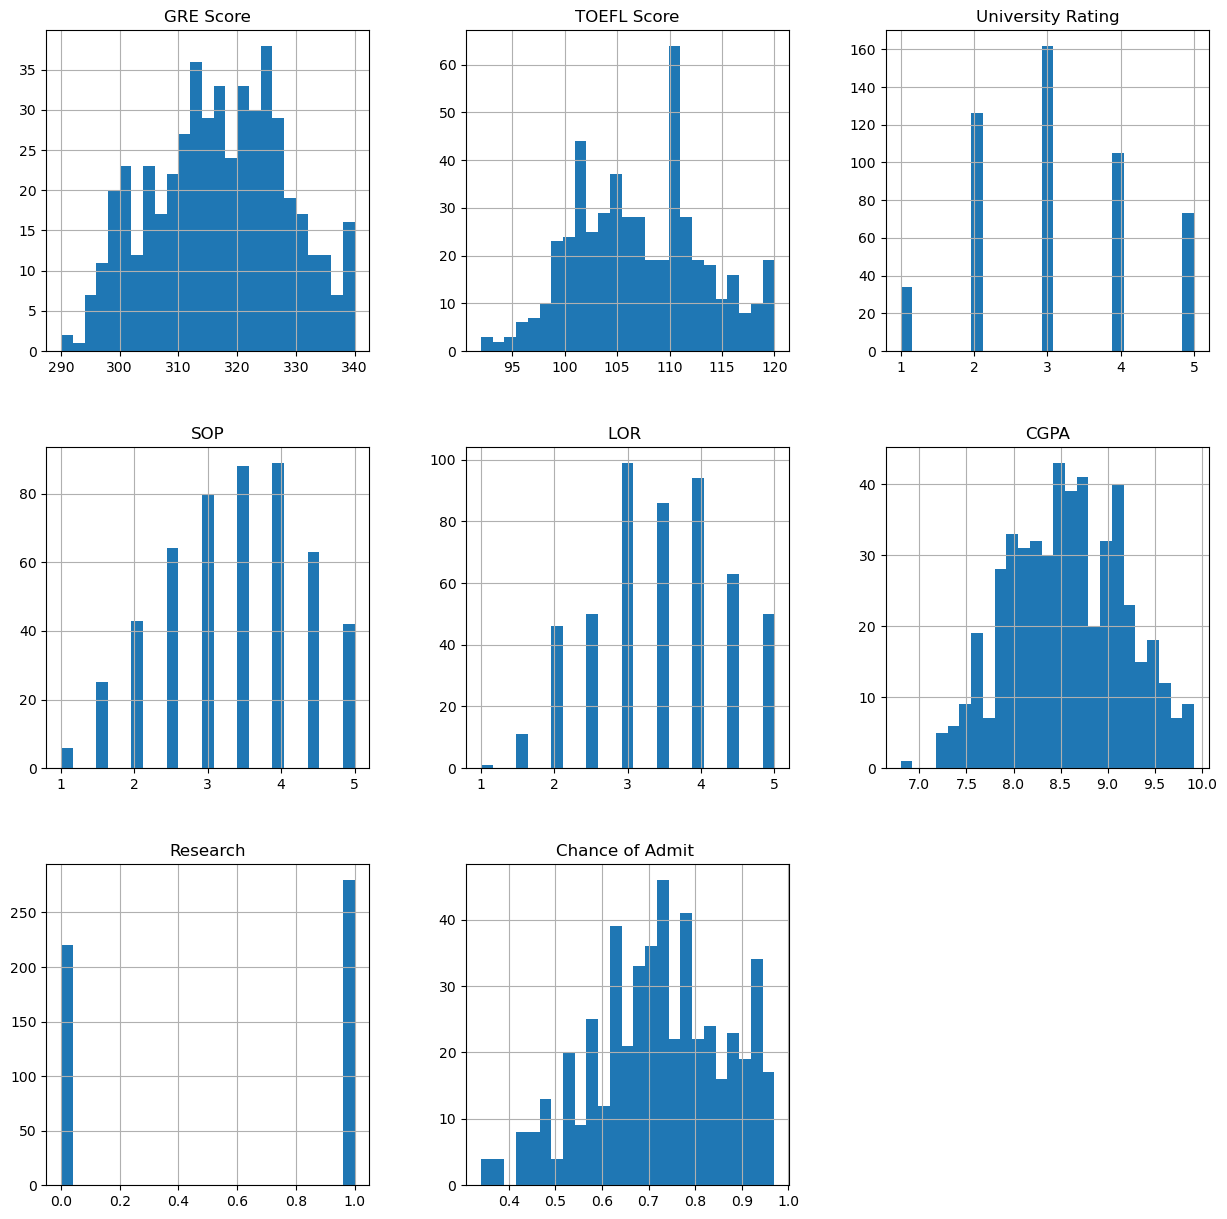

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
data.shape[0]

500

In [7]:
# Definición de variables predictoras (X)
X = data.drop('Chance of Admit ', axis=1)
# Definición de variable de interés (y)
Y = data[['Chance of Admit ']]

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

<h3>Normalizacion de los datos</h3>

In [9]:
#Escalado de las variables predictoras
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [10]:
# Celda 1
K.clear_session()
np.random.seed(42)
input=xTrain.shape[1]
output=yTrain.shape[1]
keras.utils.set_random_seed(42)

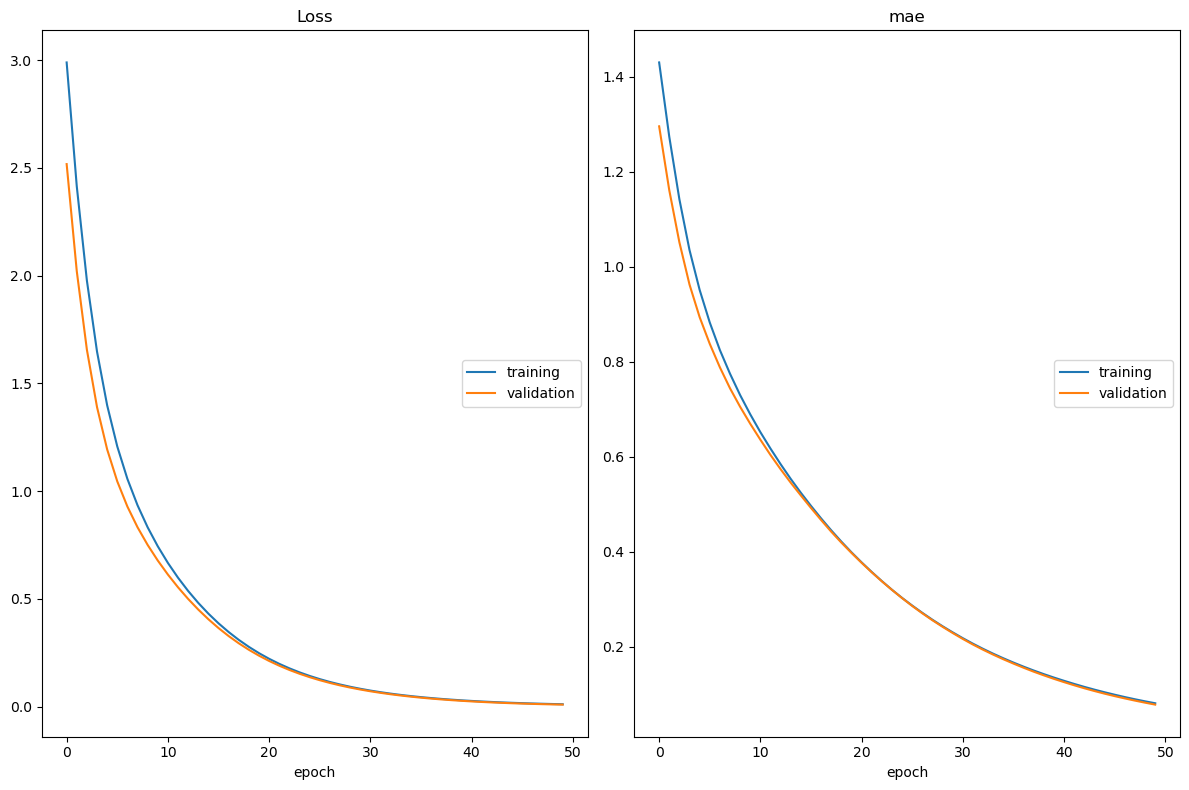

Loss
	training         	 (min:    0.011, max:    2.989, cur:    0.011)
	validation       	 (min:    0.009, max:    2.518, cur:    0.009)
mae
	training         	 (min:    0.081, max:    1.430, cur:    0.081)
	validation       	 (min:    0.078, max:    1.296, cur:    0.078)
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mae: 0.0840 - val_loss: 0.0094 - val_mae: 0.0779
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Parametros: w=0.0755, b=0.7259, r2=0.56, MSE=0.0094, MAE=0.0779


In [11]:

model=Sequential()
model.add(Dense(output, input_shape=(input,)))
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          batch_size=input,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

pred=model.predict(xTest)
mse1=mean_squared_error(yTest, pred)
mae1=mean_absolute_error(yTest, pred)
capas=model.layers[0]
w1,b1=capas.get_weights()
r21=r2_score(yTest, pred)
print('Parametros: w={:.4f}, b={:.4f}, r2={:.2f}, MSE={:.4f}, MAE={:.4f}'.format(w1[0][0],b1[0],r21,mse1,mae1))

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

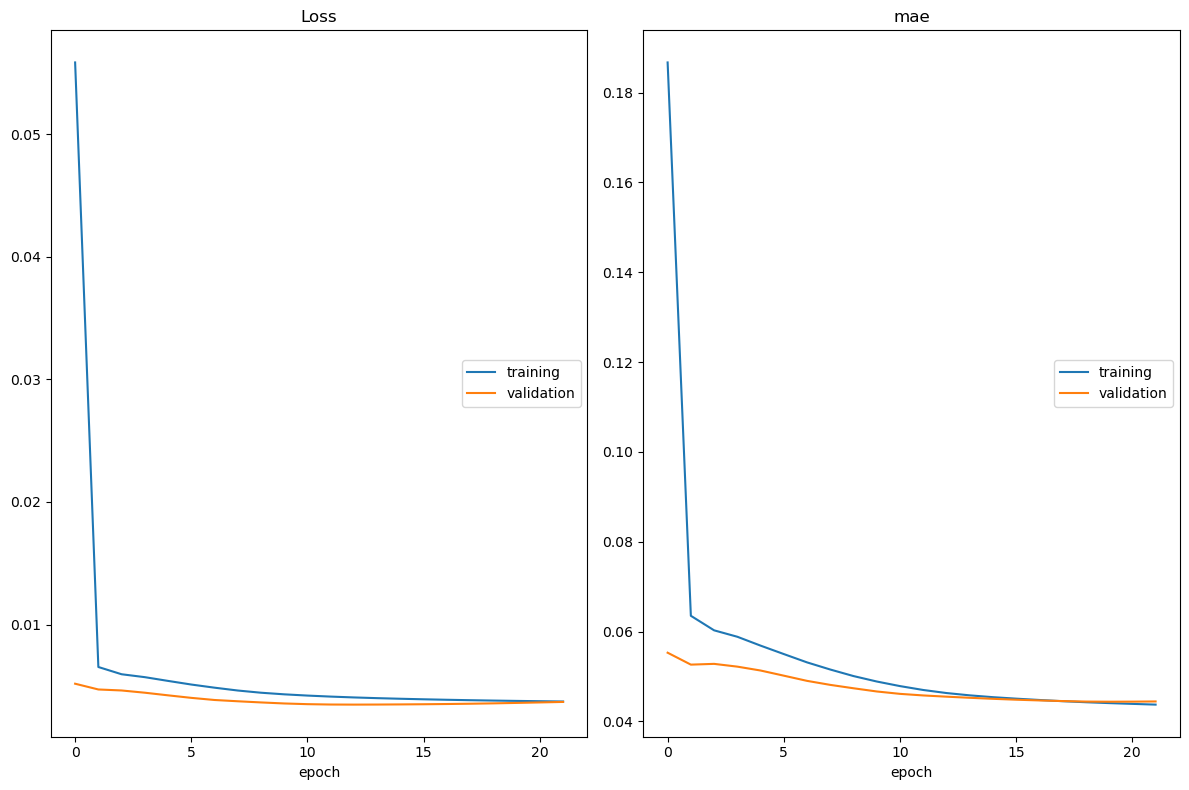

Loss
	training         	 (min:    0.004, max:    0.056, cur:    0.004)
	validation       	 (min:    0.003, max:    0.005, cur:    0.004)
mae
	training         	 (min:    0.044, max:    0.187, cur:    0.044)
	validation       	 (min:    0.044, max:    0.055, cur:    0.044)
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mae: 0.0435 - val_loss: 0.0037 - val_mae: 0.0444
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Parametros: w=0.2416, b=0.0985, r2=0.83, MSE=0.0037, MAE=0.0444


In [12]:
# Celda 2
K.clear_session()
np.random.seed(42)
keras.utils.set_random_seed(42)

adam=optimizers.Adam( learning_rate=0.005)
model = Sequential()
model.add(Dense(100,input_shape=(input,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(output, activation='sigmoid'))
model.compile(optimizer=adam, loss='mse', metrics=['mae'])
print(model.summary())
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=22, 
          batch_size=input,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

pred=model.predict(xTest)
mse2=mean_squared_error(yTest, pred)
mae2=mean_absolute_error(yTest, pred)
capas=model.layers[0]
w2,b2=capas.get_weights()
r22=r2_score(yTest, pred)
print('Parametros: w={:.4f}, b={:.4f}, r2={:.2f}, MSE={:.4f}, MAE={:.4f}'.format(w2[0][0],b2[0],r22,mse2,mae2))

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

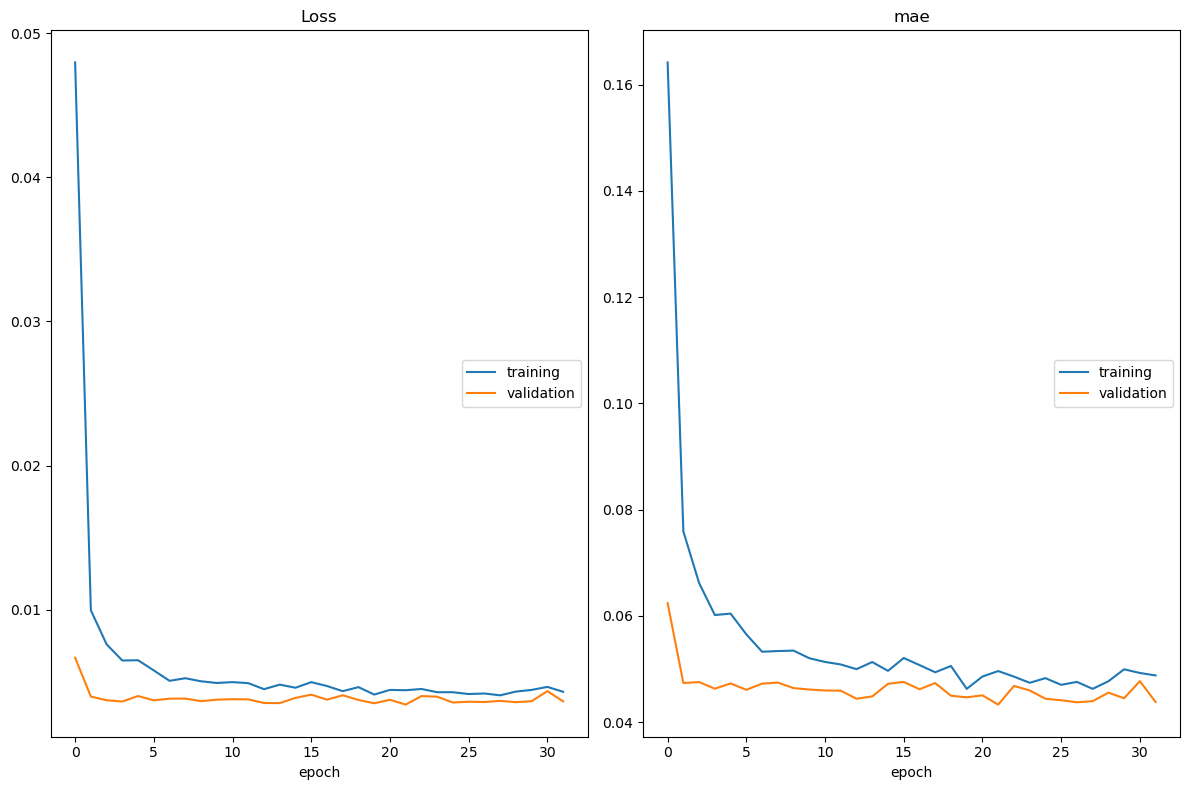

Loss
	training         	 (min:    0.004, max:    0.048, cur:    0.004)
	validation       	 (min:    0.003, max:    0.007, cur:    0.004)
mae
	training         	 (min:    0.046, max:    0.164, cur:    0.049)
	validation       	 (min:    0.043, max:    0.062, cur:    0.044)
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mae: 0.0478 - val_loss: 0.0036 - val_mae: 0.0438
Epoch 32: early stopping
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Parametros: w=0.0819, b=0.2917, r2=0.83, MSE=0.0037, MAE=0.0444


In [17]:
# Celda 3
# Celda 2
K.clear_session()
np.random.seed(42)
keras.utils.set_random_seed(42)

adam=optimizers.Adam( learning_rate=0.005)
model = Sequential()
model.add(Dense(100,input_shape=(input,)))
model.add(Dropout(rate=0.1))
model.add(Dense(10,activation='sigmoid'))
model.add(Dropout(rate=0.1))
model.add(Dense(output, activation='sigmoid'))
model.compile(optimizer=adam, loss='mse', metrics=['mae'])
print(model.summary())
time.sleep(2)
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1) 
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=35, 
          batch_size=input,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(),early_stop])

pred3=model.predict(xTest)
mse3=mean_squared_error(yTest, pred)
mae3=mean_absolute_error(yTest, pred)
r23=r2_score(yTest, pred)
capas=model.layers[0]
w3,b3=capas.get_weights()
print('Parametros: w={:.4f}, b={:.4f}, r2={:.2f}, MSE={:.4f}, MAE={:.4f}'.format(w3[0][0],b3[0],r23,mse3,mae3))

Muchas neuronas al principio permite que el modelo sea optimo, aunque 

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

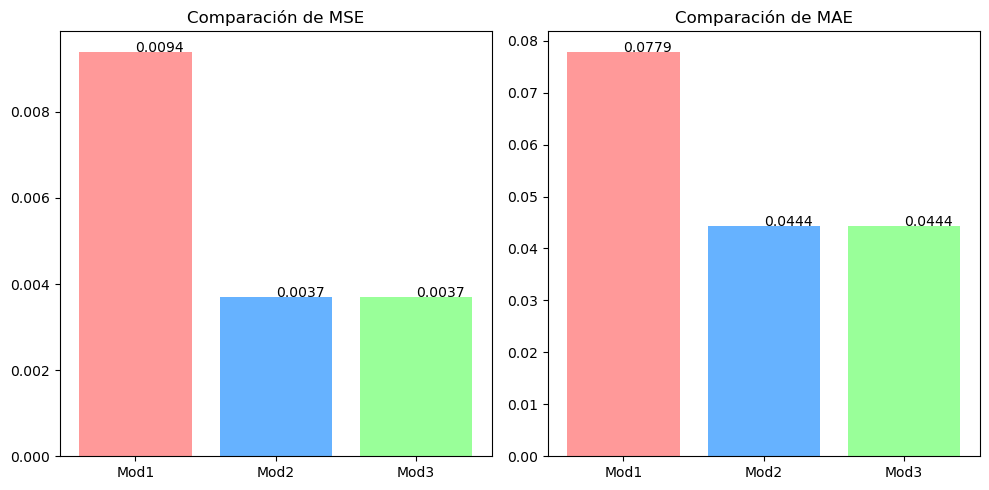

In [16]:
# Celda 4
# Celda 5
colors = ['#FF9999', '#66B2FF', '#99FF99']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Comparación de MSE")
ejeX = ['Mod1','Mod2','Mod3']
ejeY = [round(mse1,4),round(mse2,4),round(mse3,4)]
axs[0].bar(ejeX, ejeY, color=colors)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, axs[0])

axs[1].set_title("Comparación de MAE")
ejeX = ['Mod1','Mod2','Mod3']
ejeY = [round(mae1,4),round(mae2,4),round(mae3,4)]
axs[1].bar(ejeX, ejeY, color=colors)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, axs[1])

plt.tight_layout()
plt.show()